In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [2]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

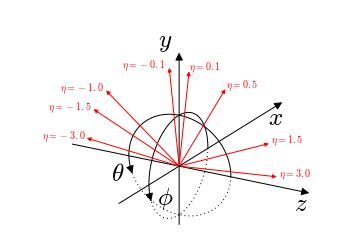

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X, Y, Z = axes3d.get_test_data(0.01)

eta = 1.5
lam = 0.8
r, theta = np.meshgrid(np.arange(-eta*1.22, eta*1.22, 0.03),
                      np.arange(-np.pi,np.pi, 0.03))
X = r*np.cos(theta)
Y = r*np.sin(theta)

Z = 0.5*(lam**2)*(X**2 + Y**2 - eta**2)**2

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

#Axis arrows
top = 2.2
head_size = 16
a = Arrow3D([0,0], [0,0], 
                [-1.25,top], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=100)
ax.add_artist(a)
b = Arrow3D([0,0], [-2.0,3.9], 
                [0,0], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=100)
ax.add_artist(b)
c = Arrow3D([-2.2,2.5], [0,0], 
                [0,0], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=100)
ax.add_artist(c)

#Axis labels
ax.text(-0.4, 0, top*1.0, "$y$", color='Black',size=25)
ax.text(0, 3.3, -0.3, "$x$", color='Black',size=25)
ax.text(2.2, 0, -0.4, "$z$", color='Black',size=25)

#Field Labels
#ax.text(eta+0.52,0.05,0.75,"$\chi$",color='Black',size=15)
#ax.text(eta+0.2,-1.2,0.0,r"$\varphi$",color='Black',size=15)

#ax.axis('tight')
ax.axis('off')

#ax.set_aspect('equal')
ax.set_zlim([0,2])
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])

#Phi
r_c = np.ones(100)*1
theta_c = np.arange(-np.pi,np.pi+0.1,(2*np.pi+0.1)/100.)
x_c = np.zeros(100)
z_c = r_c*np.cos(theta_c)
y_c = r_c*np.sin(theta_c)

index = 20
end = 75

ax.plot(x_c[:index],y_c[:index],z_c[:index],color='Black',ls=':')
ax.plot(x_c[end:],y_c[end:],z_c[end:],color='Black',ls=':')
ax.plot(x_c[index:end],y_c[index:end],z_c[index:end],color='Black')

d = Arrow3D([x_c[index],x_c[index-1]],
            [y_c[index],y_c[index-1]],
            [z_c[index],z_c[index-1]],
            mutation_scale=head_size, 
            lw=1, arrowstyle="-|>", color="Black",zorder=100)
ax.add_artist(d)
ax.text(x_c[index],y_c[index]+0.2,z_c[index]-0.2,"$\phi$",color='Black',size=25)

#Theta
r_c = np.ones(100)*1
theta_c = np.arange(-np.pi,np.pi+0.1,(2*np.pi+0.1)/100.)
y_c = np.zeros(100)
z_c = r_c*np.cos(theta_c)
x_c = r_c*np.sin(theta_c)

index = 20
end = 75

ax.plot(x_c[:index],y_c[:index],z_c[:index],color='Black',ls=':')
ax.plot(x_c[end:],y_c[end:],z_c[end:],color='Black',ls=':')
ax.plot(x_c[index:end],y_c[index:end],z_c[index:end],color='Black')

e = Arrow3D([x_c[index],x_c[index-1]],
            [y_c[index],y_c[index-1]],
            [z_c[index],z_c[index-1]],
            mutation_scale=head_size, 
            lw=1, arrowstyle="-|>", color="Black",zorder=100)
ax.add_artist(e)



pseudorapidities = [-3,-1.5,-1.0,-0.1,0.1,3,1.5,0.5,]
for pseudo in pseudorapidities:
    length = 1.9
    theta = np.arctan(np.exp(-1*pseudo))*2
    #ax.plot([0,length*np.cos(theta)],[0,0],[0,length*np.sin(theta)],color='Red',lw=1.0,ls='-')
    
    e = Arrow3D([0,length*np.cos(theta)],
                [0,0],[0,length*np.sin(theta)],
                mutation_scale=head_size/2, 
                lw=1, arrowstyle="-|>", color="Red",zorder=100)
    if pseudo < 0:
        shift_x = -0.9
        shift_y = -0.2        
    else:
        shift_x = 0
        shift_y = 0
        
    ax.text(length*np.cos(theta)+shift_x,0,length*np.sin(theta)+shift_y,
            r"$\eta=%1.1f$"%(pseudo),color='Red',size=10)
    ax.add_artist(e)

ax.text(x_c[index]-0.3,y_c[index]-0.2,z_c[index]-0.2,r"$\theta$",color='Black',size=25)

plt.savefig('CMS_coords.pdf', bbox_inches='tight', pad_inches=0)
plt.show()